# .Preparing data
we have "null" values that means null but python can't understand it . so first we should covert it to understandble null(NaN) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# .General information

In [2]:
data = pd.read_csv('../Input/apartments_for_rent.csv')
data = data.drop(columns = ['body'])
data.head()

,id,category,title,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,NaN,NaN,1.0,USD,No,Thumbnail,NaN,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,NaN,1.0,0.0,USD,No,Thumbnail,NaN,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   amenities      6451 non-null   object 
 4   bathrooms      9966 non-null   float64
 5   bedrooms       9993 non-null   float64
 6   currency       10000 non-null  object 
 7   fee            10000 non-null  object 
 8   has_photo      10000 non-null  object 
 9   pets_allowed   5837 non-null   object 
 10  price          10000 non-null  int64  
 11  price_display  10000 non-null  object 
 12  price_type     10000 non-null  object 
 13  square_feet    10000 non-null  int64  
 14  address        6673 non-null   object 
 15  cityname       9923 non-null   object 
 16  state          9923 non-null   object 
 17  latitude       9990 non-null   float64
 18  longitu

In [4]:
data.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


# .Showing the distribution of houses and their prices
We want to draw a graph to examine the latitude and longitude ranges in which advertised houses are concentrated and what the prices of these houses are.

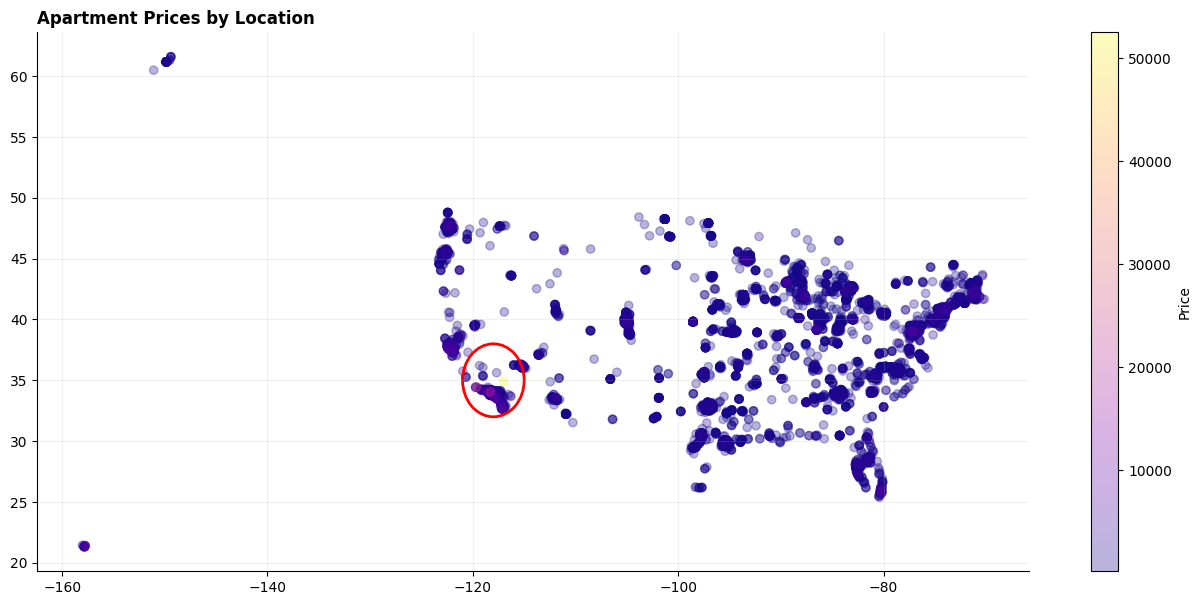

In [5]:
fig,ax = plt.subplots(figsize=(16, 7))
scatter = ax.scatter(
    data['longitude'], 
    data['latitude'], 
    c=data['price'], 
    cmap='plasma', 
    alpha=0.3
)
plt.colorbar(scatter, label='Price')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='both',alpha = 0.2)
plt.title('Apartment Prices by Location',fontweight='bold',loc='left')

circle = Circle(
    (-118, 35),  
    radius=3,
    edgecolor='red',
    facecolor='none',
    linewidth=2,
    linestyle='solid',
    label='Target Area'
)
ax.add_patch(circle)
plt.show()


In [6]:
data.loc[data['price'] == data['price'].max(), ['longitude','latitude','cityname']]

,longitude,latitude,cityname
8829,-117.035,34.887,Barstow


As you can see, most of the listings are in the -80 to -100 latitude and 30 to 45 longitude ranges and have the same price range. Also, the most expensive homes in Barstow are in the -118 and 35 ranges.

# .Impact of different columns on apartment prices
In this dataset, there are various columns such as number of rooms, etc. that will definitely affect the rental price. In this section, we want to see to what extent this effect is and which is the most effective numeric column. Note that since we want to use the correlation coefficient, we should only consider numeric columns. We will discuss non-numeric columns a little later.

In [7]:
data['square_feet'] = data['square_feet']
data['listed_date'] = pd.to_datetime(data['time'], unit='s')
data_correlation = data[['bathrooms','bedrooms','square_feet','price','listed_date']].copy()
data_correlation.head()

,bathrooms,bedrooms,square_feet,price,listed_date
0,NaN,0.0,101,790,2019-12-26 11:23:35
1,NaN,1.0,106,425,2019-12-22 12:17:43
2,1.0,0.0,107,1390,2019-12-26 11:23:30
3,1.0,0.0,116,925,2019-12-18 11:15:43
4,NaN,0.0,125,880,2019-12-26 11:23:21


Since the max and min publication dates of the ads are both in 2019, we create a new column and count the number of days from the first date to find the correlation coefficient of this column with the price. Note that the time column, which is a Unix timestamp type, is not suitable because it makes slight changes to the number itself.

In [8]:
data_correlation['days_since_first_listing'] = (data_correlation['listed_date'] - data_correlation['listed_date'].min()).dt.days
data_correlation.head()

,bathrooms,bedrooms,square_feet,price,listed_date,days_since_first_listing
0,NaN,0.0,101,790,2019-12-26 11:23:35,99
1,NaN,1.0,106,425,2019-12-22 12:17:43,95
2,1.0,0.0,107,1390,2019-12-26 11:23:30,99
3,1.0,0.0,116,925,2019-12-18 11:15:43,91
4,NaN,0.0,125,880,2019-12-26 11:23:21,99


In [9]:
data_correlation.corr()

,bathrooms,bedrooms,square_feet,price,listed_date,days_since_first_listing
bathrooms,1.000000,0.705856,0.796557,0.411655,-0.048461,-0.048516
bedrooms,0.705856,1.000000,0.589194,0.306456,0.032311,0.032222
square_feet,0.796557,0.589194,1.000000,0.390771,0.006829,0.006769
price,0.411655,0.306456,0.390771,1.000000,-0.022298,-0.022328
listed_date,-0.048461,0.032311,0.006829,-0.022298,1.000000,0.999996
days_since_first_listing,-0.048516,0.032222,0.006769,-0.022328,0.999996,1.000000


In the price column you can see the correlation coefficient of the other columns with it. As you can see, the rental price is most affected by the number of bathrooms. This is normal. Because the range in which a house can have bathrooms is a small range, it is normal for the price to increase as the number of bathrooms increases.Also, since the correlation coefficient of the number of days from the first order with the price is close to zero, it can be concluded that there was price stability during this 4-month period and inflation was negligible.

# .Distribution of quantitative criteria based on sources
In this section, we are going to look at the ad source level to see how our quantitative metrics are based on each of these sources.

In [10]:
data.groupby('source').agg({'source':'count'})

,source
source,
GoSection8,31
Home Rentals,1
Listanza,23
ListedBuy,179
RENTCafé,1
RENTOCULAR,16
Real Estate Agent,1
RealRentals,69
RentDigs.com,2764


Since 90 % of the ads in the dataset are from RentDigs.com and RentLingo, and to increase the quality of the chart, we do not consider the other sources in this issue.

In [11]:
data_distribution = data.loc[data['source'].isin(['RentDigs.com','RentLingo'])].copy()
data_distribution['source'].value_counts()

source
RentLingo       6912
RentDigs.com    2764
Name: count, dtype: int64

In [12]:
data_distribution = data_distribution[['source','square_feet','price','longitude','latitude']]
data_distribution.head()

,source,square_feet,price,longitude,latitude
0,RentLingo,101,790,-76.9861,38.9057
1,RentLingo,106,425,-87.6621,37.9680
2,RentLingo,107,1390,-77.0816,38.8910
3,RentLingo,116,925,-122.3275,47.6160
4,RentLingo,125,880,-77.1055,38.8738


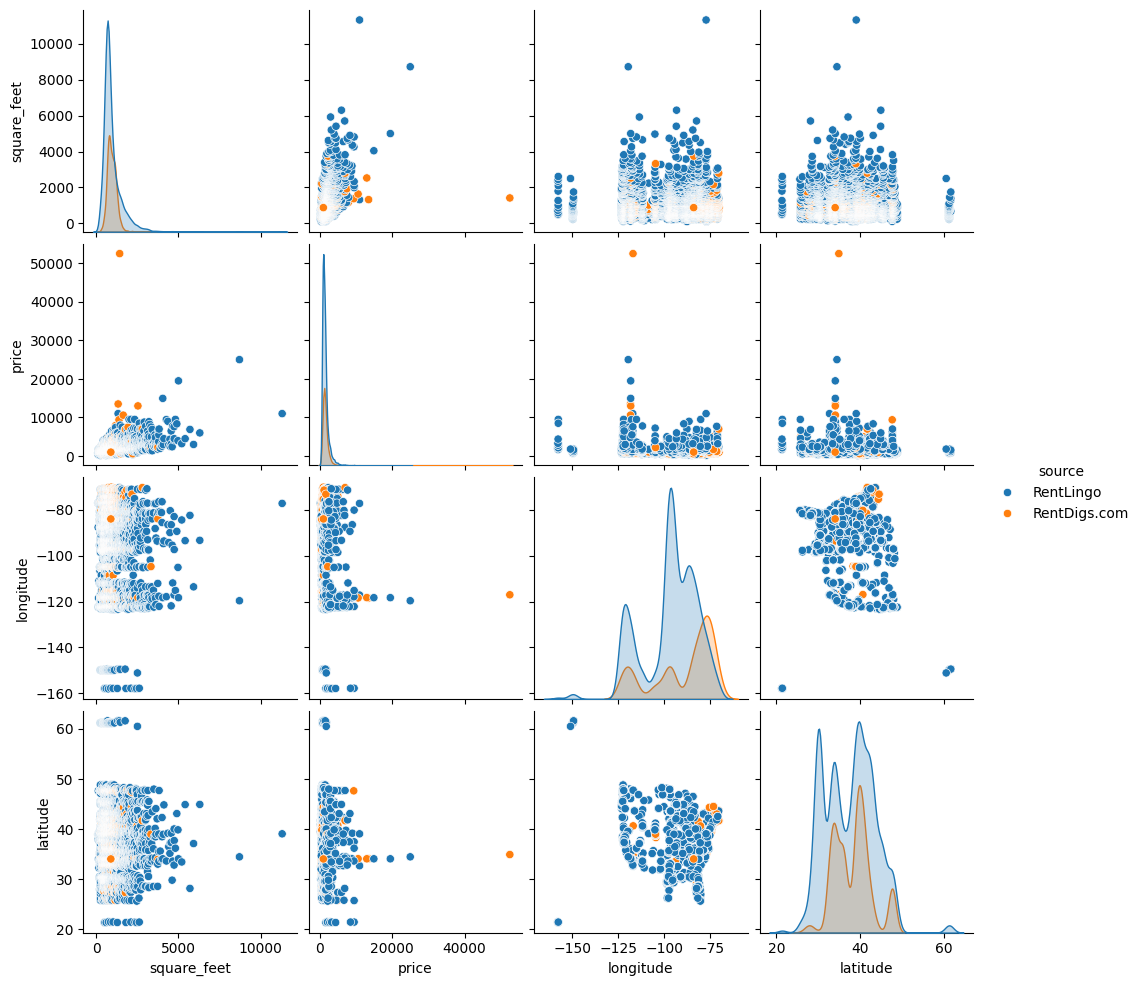

In [28]:
sns.pairplot(data_distribution , hue="source")
plt.show()

# .Count of advertise by state
In this step, we first group the number of ads based on different states and then plot it.

In [14]:
data_count_state = data.groupby('state').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
data_count_state

,state,count
43,TX,1737
4,CA,955
47,WA,519
27,NC,438
20,MD,424
31,NJ,383
10,GA,372
9,FL,339
35,OH,321
5,CO,318


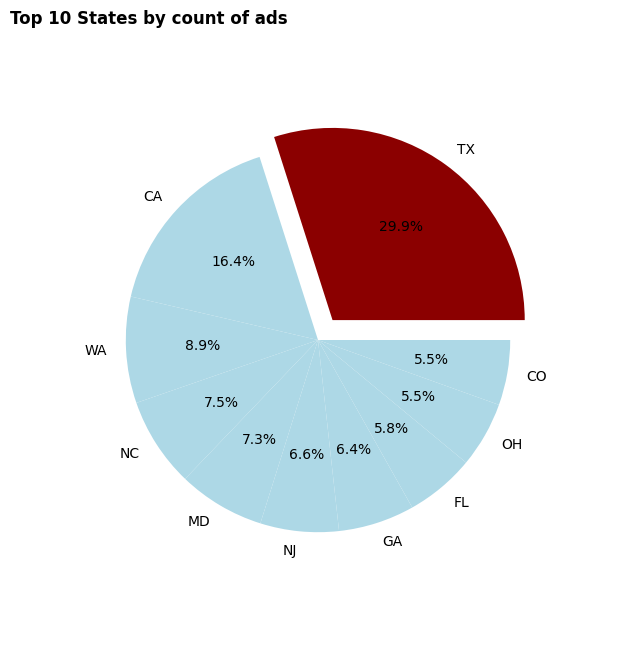

In [30]:
fig,ax = plt.subplots(figsize=(12,8))
ax.pie(data_count_state['count'],labels =data_count_state['state'],
       autopct='%1.1f%%',
       radius=0.78,
       explode=(0.1,0,0,0,0,0,0,0,0,0),
       colors=('darkred','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue'))
ax.set_title('Top 10 States by count of ads',loc='left',fontweight = 'bold')
plt.show()

# .Rental Price Dispersion by City
In this section, we want to extract the top cities in terms of the number of ads and then calculate their standard deviation and mean to conclude whether the high standard deviation is necessarily due to the high mean.

In [16]:
data_city = data.groupby('cityname')['price'].agg(['count','mean','std']).sort_values('count',ascending=False)
data_city = data_city.head(20)
data_city

,count,mean,std
cityname,,,
Austin,523,1196.718929,338.182668
Dallas,216,1306.777778,520.981602
Houston,186,1009.666667,321.065450
San Antonio,182,1057.071429,342.134768
Los Angeles,165,3117.024242,2380.525900
Chicago,148,1686.608108,825.716828
Madison,121,1599.347107,898.119366
Portland,113,1595.646018,634.300556
Denver,105,1580.619048,818.613220


C:\Users\NoteBook\AppData\Local\Temp\ipykernel_6300\1424059319.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data_city.index, rotation=45)


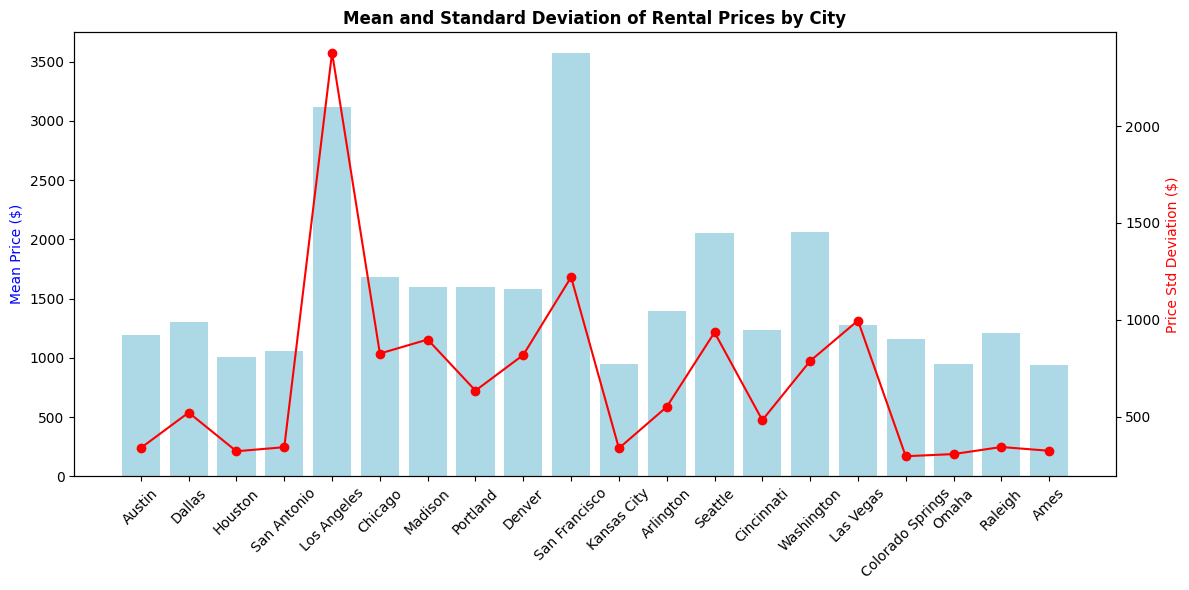

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(data_city.index, data_city['mean'], color='lightblue', label='Mean Price')
ax1.set_ylabel('Mean Price ($)', color='blue')
ax1.tick_params(axis='y')
ax1.set_xticklabels(data_city.index, rotation=45)
ax2 = ax1.twinx()
ax2.plot(data_city.index, data_city['std'], color='red', marker='o', label='Price Std Dev')
ax2.set_ylabel('Price Std Deviation ($)', color='red')
ax2.tick_params(axis='y')

plt.title('Mean and Standard Deviation of Rental Prices by City',fontweight = 'bold')
fig.tight_layout()
plt.show()

# .Mean of bedrooms and bathrooms per each square feet range
We want to divide the square footage of the houses into several categories and then calculate the average number of rooms, bathrooms and finally the price of the house.

In [18]:
data['square_feet'].max()

np.int64(40000)

In [19]:
data['square_feet'].min()

np.int64(101)

Now we draw a histogram of the area to see the dispersion of the data.

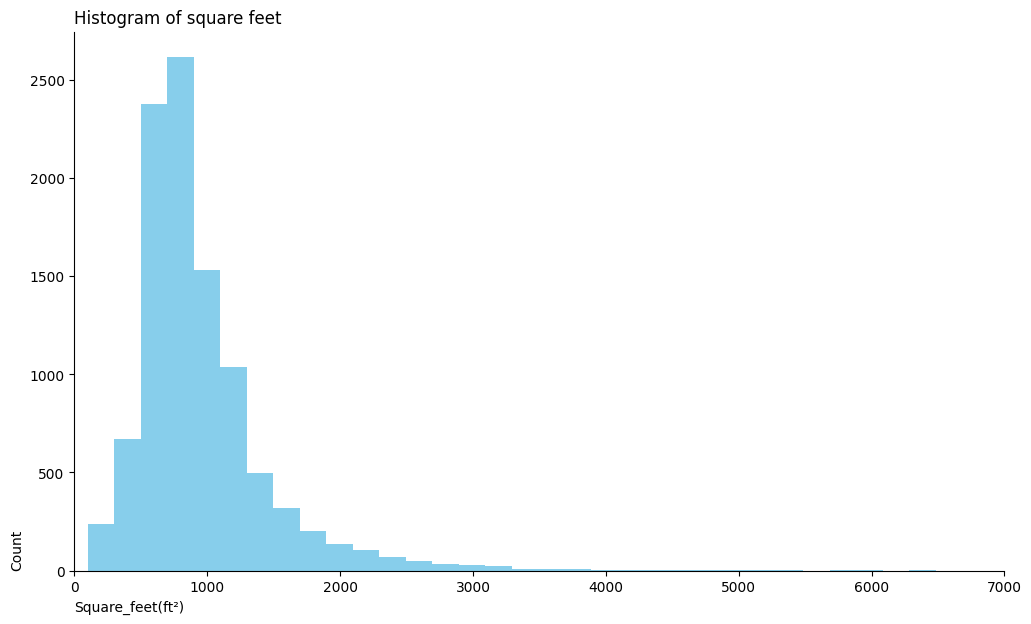

In [20]:
fig,ax = plt.subplots(figsize=(12,7))
ax.hist(data['square_feet'],bins=200,color='skyblue')
ax.set_xlim(0,7000)
ax.set_title('Histogram of square feet',loc='left')
ax.set_ylabel('Count',loc='bottom')
ax.set_xlabel('Square_feet(ft²)',loc='left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [21]:
data[data['square_feet']>4000].count()

id               27
category         27
title            27
amenities         6
bathrooms        26
bedrooms         27
currency         27
fee              27
has_photo        27
pets_allowed     10
price            27
price_display    27
price_type       27
square_feet      27
address          26
cityname         27
state            27
latitude         27
longitude        27
source           27
time             27
listed_date      27
dtype: int64

In [22]:
data_mean_per_squarefeet = data[['square_feet','bathrooms','bedrooms','price']].copy()

In [23]:
data_mean_per_squarefeet['square_feet_range'] = pd.cut(data_mean_per_squarefeet['square_feet'],
     bins = [0,500,1000,1500,2000,2500,3000,3500,4000,40000],
     labels= ['[0,500]','[500,1000]','[1000,1500]','[1500,2000]','[2000,2500]','[2500,3000]','[3000,3500]','[3500,4000]','more than 4000'],
     right=True)
data_mean_per_squarefeet.head()

,square_feet,bathrooms,bedrooms,price,square_feet_range
0,101,NaN,0.0,790,"[0,500]"
1,106,NaN,1.0,425,"[0,500]"
2,107,1.0,0.0,1390,"[0,500]"
3,116,1.0,0.0,925,"[0,500]"
4,125,NaN,0.0,880,"[0,500]"


In [24]:
data_mean_per_squarefeet.drop(columns='square_feet',inplace=True)
data_mean_per_squarefeet.head()

,bathrooms,bedrooms,price,square_feet_range
0,NaN,0.0,790,"[0,500]"
1,NaN,1.0,425,"[0,500]"
2,1.0,0.0,1390,"[0,500]"
3,1.0,0.0,925,"[0,500]"
4,NaN,0.0,880,"[0,500]"


In [25]:
data_mean_per_squarefeet = data_mean_per_squarefeet.groupby('square_feet_range')[['bathrooms','bedrooms','price']].mean().reset_index()
data_mean_per_squarefeet

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_6300\1638454614.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_mean_per_squarefeet = data_mean_per_squarefeet.groupby('square_feet_range')[['bathrooms','bedrooms','price']].mean().reset_index()


,square_feet_range,bathrooms,bedrooms,price
0,"[0,500]",1.003535,1.181456,1104.309453
1,"[500,1000]",1.093409,1.352321,1287.747111
2,"[1000,1500]",1.848265,2.308989,1743.727996
3,"[1500,2000]",2.208703,3.129893,2060.648936
4,"[2000,2500]",2.508696,3.610390,2442.060606
5,"[2500,3000]",2.774725,4.010989,3264.450549
6,"[3000,3500]",3.244186,4.093023,3903.790698
7,"[3500,4000]",3.710526,4.894737,3556.684211
8,more than 4000,4.653846,4.851852,7126.296296


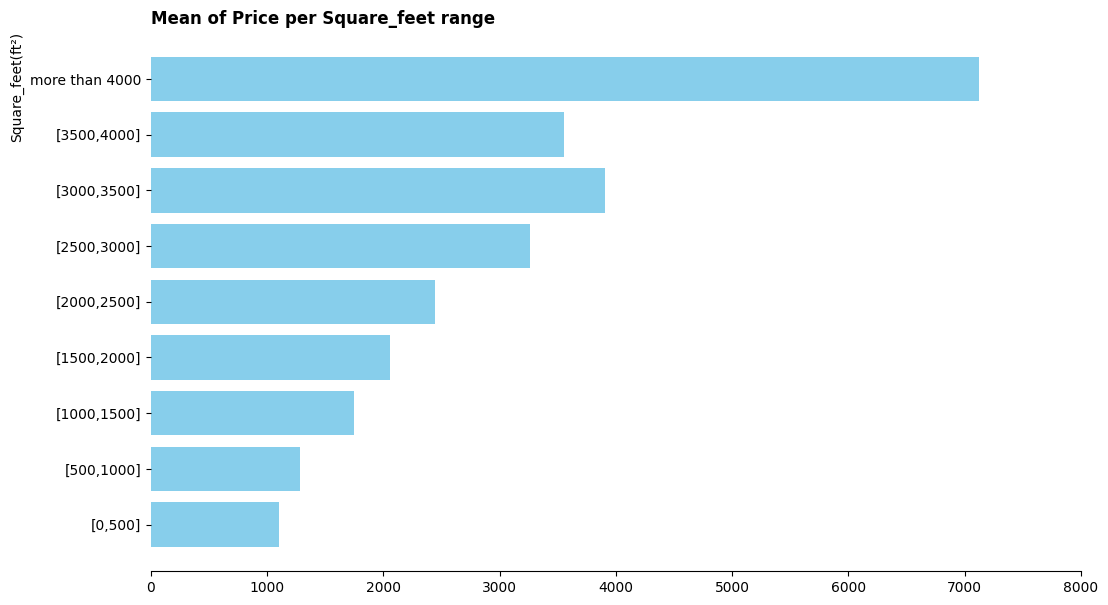

In [26]:
fig,ax = plt.subplots(figsize=(12,7))
ax.barh(data_mean_per_squarefeet['square_feet_range'],data_mean_per_squarefeet['price'],color = 'skyblue')
ax.set_xlim(0,8000)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Mean of Price per Square_feet range',fontweight = 'bold',loc='left')
ax.set_ylabel('Square_feet(ft²)',loc='top')
plt.show()